In [2]:

import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [3]:

df=pd.read_csv("cardata.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 26)

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# CLEANING OF DATA

In [9]:

df["Model"]=df.CarName.apply(lambda x:str(x.split(' ')[0]))
df.drop('CarName',axis=1,inplace=True)
df.drop('car_ID',axis=1,inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Model
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [10]:

df.Model.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
# correcting spellings
df.Model.replace('maxda','mazda',inplace=True)
df.Model.replace('Nissan', 'nissan',inplace=True)
df.Model.replace('porcshce','porsche',inplace=True)
df.Model.replace(['vokswagen','vw'],'volkswagen',inplace=True)
df.Model.replace('toyouta','toyota',inplace=True)
df.Model.unique()

In [12]:
df.fuelsystem.replace('mpfi','mfi',inplace=True)

In [13]:
df.symboling.unique().sum()

3

# visualising categorical features

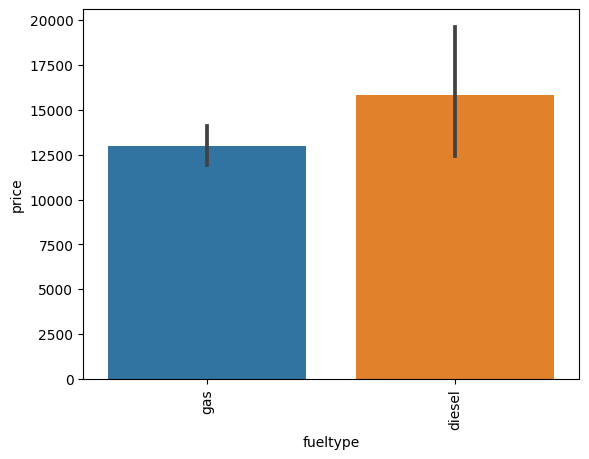

In [14]:
sbn.barplot(x=df['fueltype'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

price of diesel cars are more

<Axes: xlabel='fueltype', ylabel='Count'>

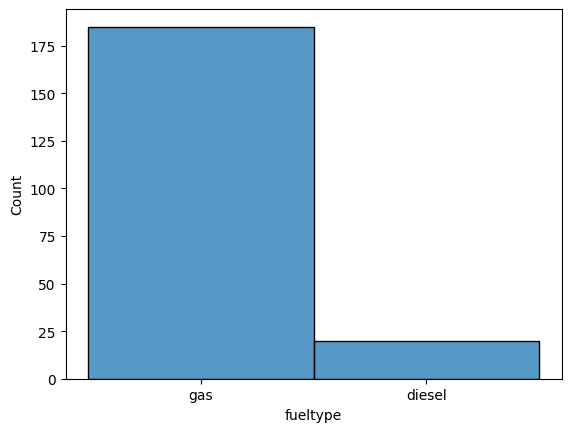

In [15]:
sbn.histplot(df.fueltype)

demand of gasoline cars are more

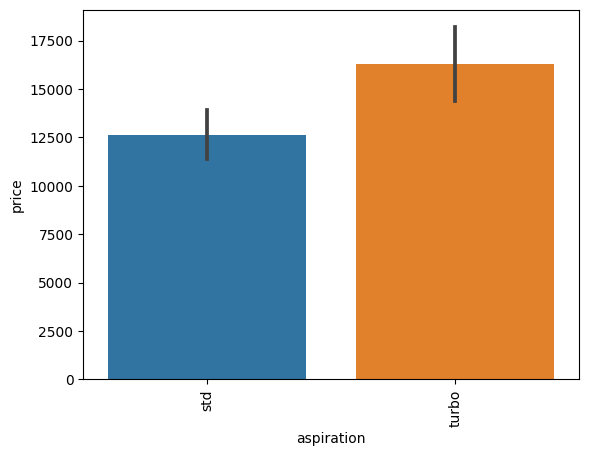

In [16]:
sbn.barplot(x=df['aspiration'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

price of turbo cars are more

<Axes: xlabel='aspiration', ylabel='Count'>

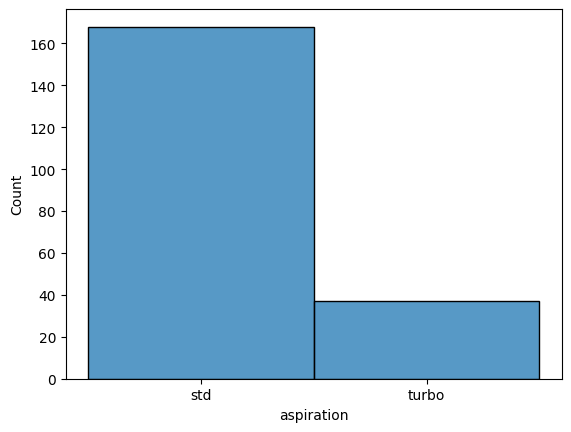

In [17]:
sbn.histplot(df.aspiration)

standard cars are more in demand

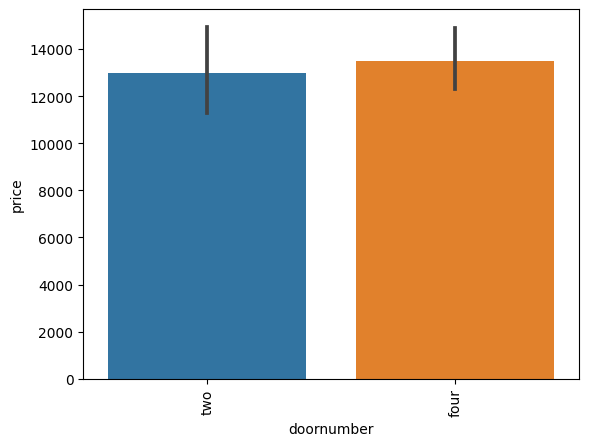

In [18]:
sbn.barplot(x=df['doornumber'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

there is not much difference in cars with 2door and 4door

<Axes: xlabel='doornumber', ylabel='Count'>

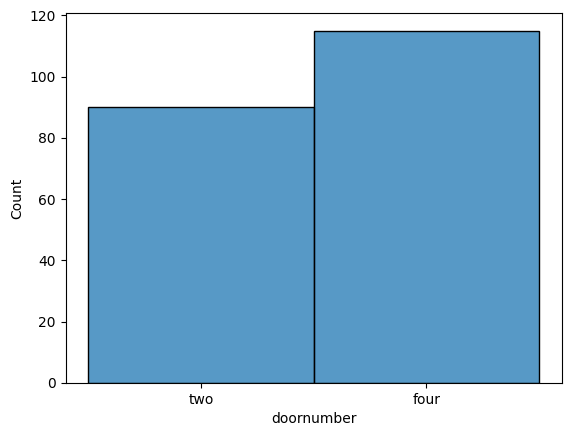

In [19]:
sbn.histplot(df.doornumber)

fourwheeldrive is more in demand

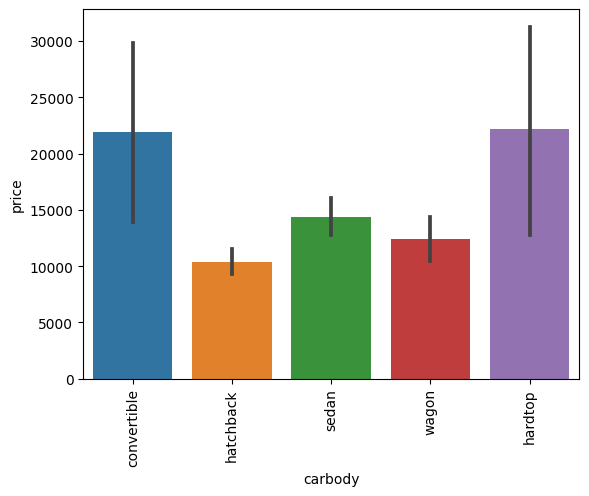

In [20]:
sbn.barplot(x=df['carbody'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

max price= convertible and hardtop (nearly same)
min price is of hatchback

<Axes: xlabel='drivewheel', ylabel='Count'>

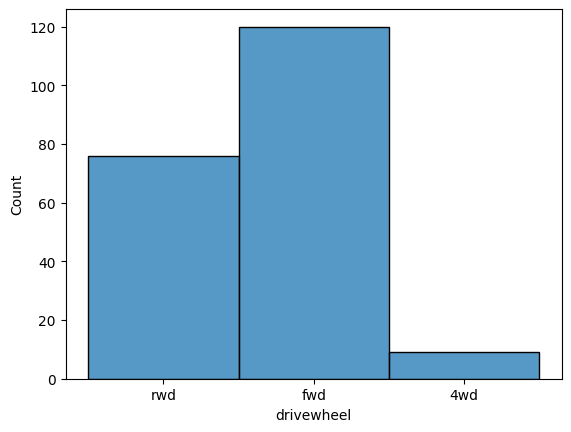

In [21]:
sbn.histplot(df.drivewheel)

demand of forward drive is max.
demand for 4wheeldrive is noticeably less...

<Axes: xlabel='enginelocation', ylabel='Count'>

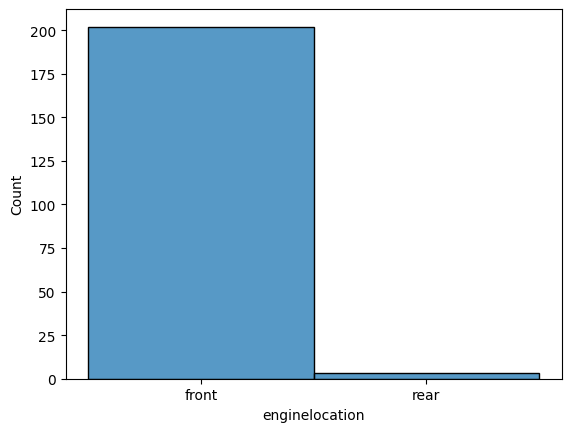

In [22]:
sbn.histplot(df.enginelocation)

demand for front is max
demand for rear is considerably less.

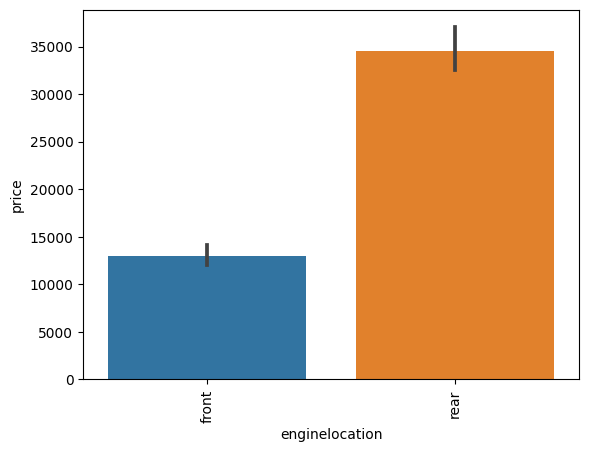

In [23]:
sbn.barplot(x=df['enginelocation'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

price of rear is quite higher than front.

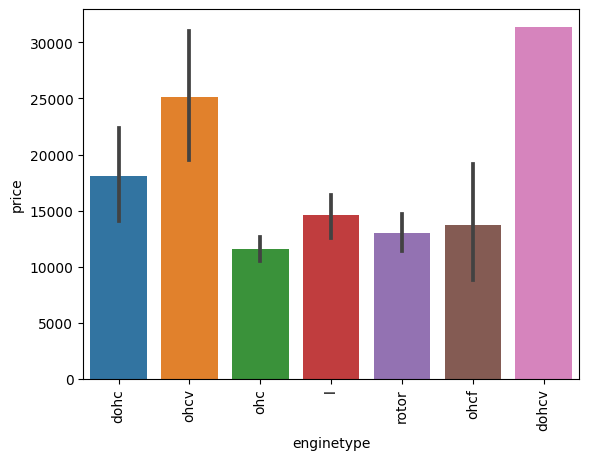

In [24]:
sbn.barplot(x=df['enginetype'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='enginetype', ylabel='Count'>

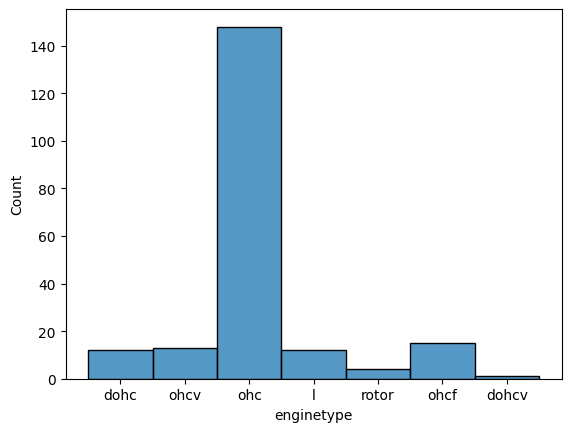

In [25]:
sbn.histplot(df.enginetype)

demand for ohc is considerably high.

In [26]:
def e(x):
    if x=='ohc':
     return x
    else :return 'others'

In [27]:
df['enginetype']=df['enginetype'].apply(lambda x: e(x))

In [28]:
df['enginetype'].unique()

array(['others', 'ohc'], dtype=object)

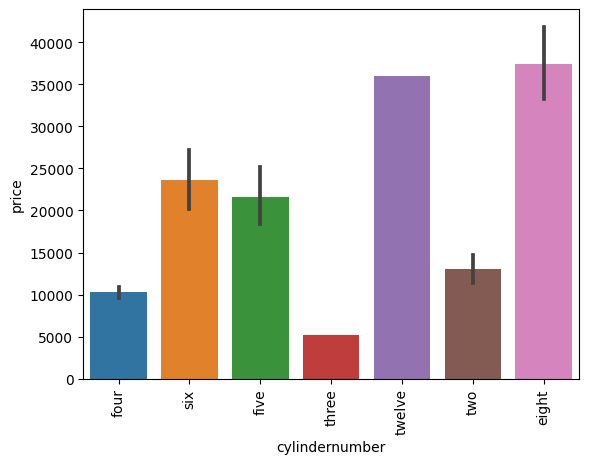

In [29]:
sbn.barplot(x=df['cylindernumber'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

price for cars with 12 and cylinders are almost same.


<Axes: xlabel='cylindernumber', ylabel='Count'>

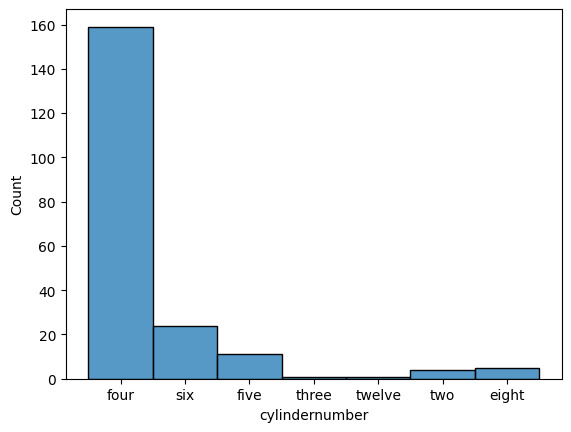

In [30]:
sbn.histplot(df.cylindernumber)

demand for four cylinder number is quite high.

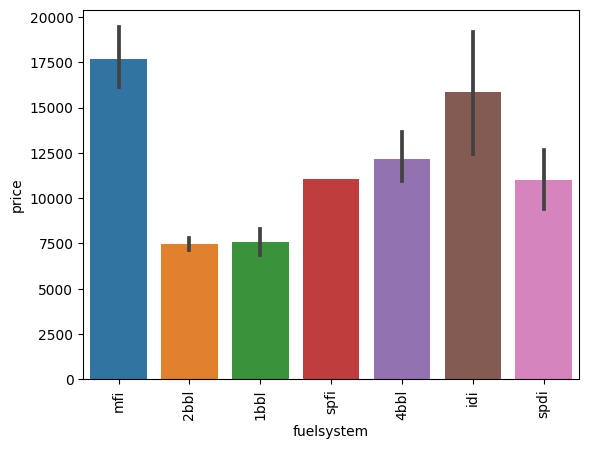

In [31]:
sbn.barplot(x=df['fuelsystem'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

price for mfi and idi are nearby .

<Axes: xlabel='fuelsystem', ylabel='Count'>

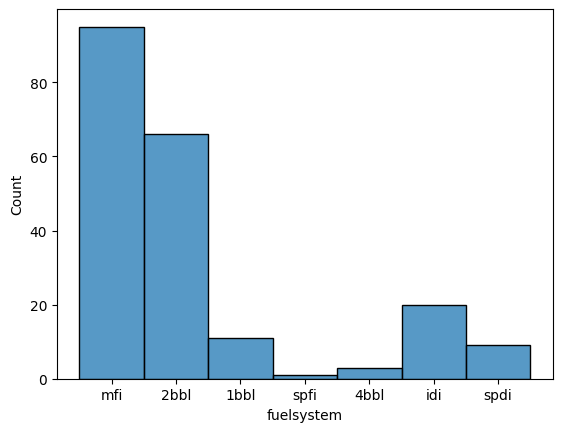

In [32]:
sbn.histplot(df.fuelsystem)

price of mfi is high

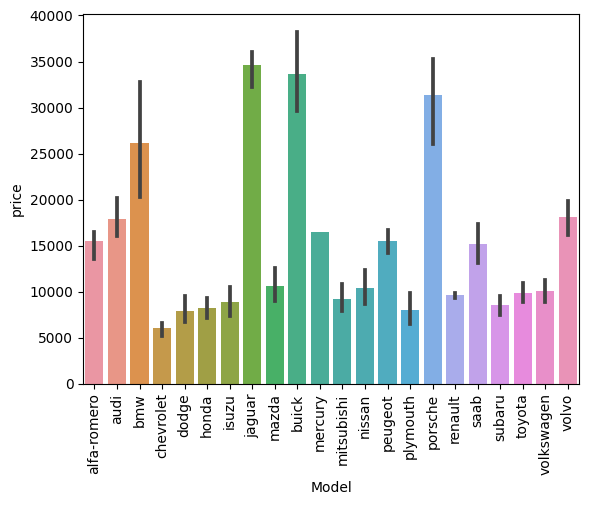

In [33]:
sbn.barplot(x=df['Model'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

Prices of Jaguar, mazda,porsche are quite higher.

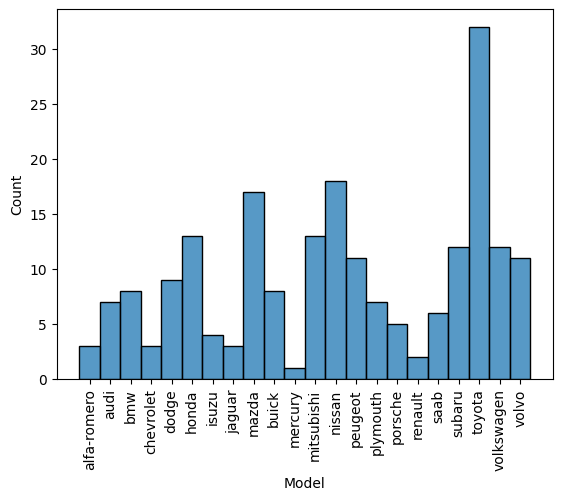

In [34]:
sbn.histplot(df.Model)
plt.xticks(rotation='vertical')
plt.show()

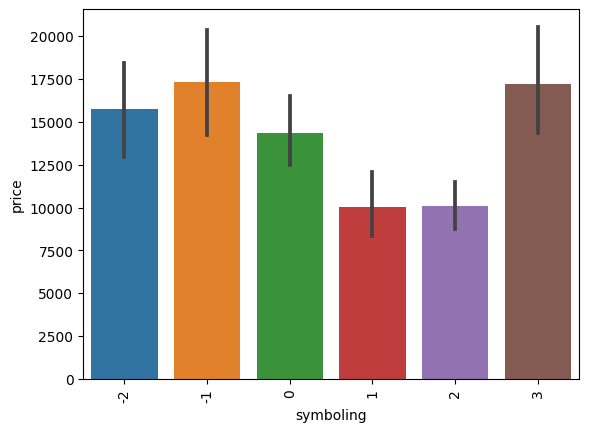

In [35]:
sbn.barplot(x=df['symboling'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='symboling', ylabel='Count'>

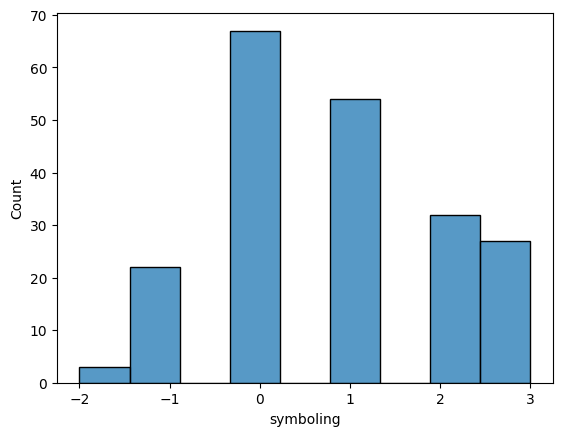

In [36]:
sbn.histplot(df.symboling)

In [37]:
#separating categorical columns 
cat=['carbody','enginelocation','enginetype','Model']
print(cat)       

['carbody', 'enginelocation', 'enginetype', 'Model']


In [38]:
for col in cat:
    print(col,df[col].unique())

carbody ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
enginelocation ['front' 'rear']
enginetype ['others' 'ohc']
Model ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [39]:
cat_data=df[cat]
print(cat_data)

         carbody enginelocation enginetype        Model
0    convertible          front     others  alfa-romero
1    convertible          front     others  alfa-romero
2      hatchback          front     others  alfa-romero
3          sedan          front        ohc         audi
4          sedan          front        ohc         audi
..           ...            ...        ...          ...
200        sedan          front        ohc        volvo
201        sedan          front        ohc        volvo
202        sedan          front     others        volvo
203        sedan          front        ohc        volvo
204        sedan          front        ohc        volvo

[205 rows x 4 columns]


In [40]:
cate=[]
for col in df:
    if (df[col].dtype=='object'):
        cate.append(col)

cate.append('symboling')     
cate_data=df[cate] 
print(cate_data)  

    fueltype aspiration doornumber      carbody drivewheel enginelocation  \
0        gas        std        two  convertible        rwd          front   
1        gas        std        two  convertible        rwd          front   
2        gas        std        two    hatchback        rwd          front   
3        gas        std       four        sedan        fwd          front   
4        gas        std       four        sedan        4wd          front   
..       ...        ...        ...          ...        ...            ...   
200      gas        std       four        sedan        rwd          front   
201      gas      turbo       four        sedan        rwd          front   
202      gas        std       four        sedan        rwd          front   
203   diesel      turbo       four        sedan        rwd          front   
204      gas      turbo       four        sedan        rwd          front   

    enginetype cylindernumber fuelsystem        Model  symboling  
0       

NUMERICAL DATA VISUALISATION

In [41]:
num_data=df.drop(cate,axis=1)
num_data.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

seeing the price-our target 

<Axes: xlabel='price', ylabel='Density'>

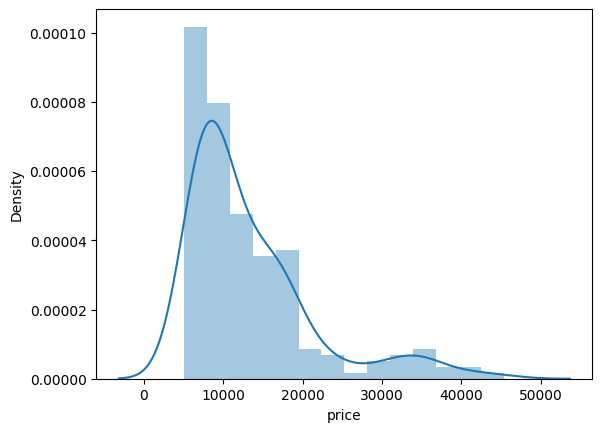

In [42]:
sbn.distplot(df.price)

<Axes: >

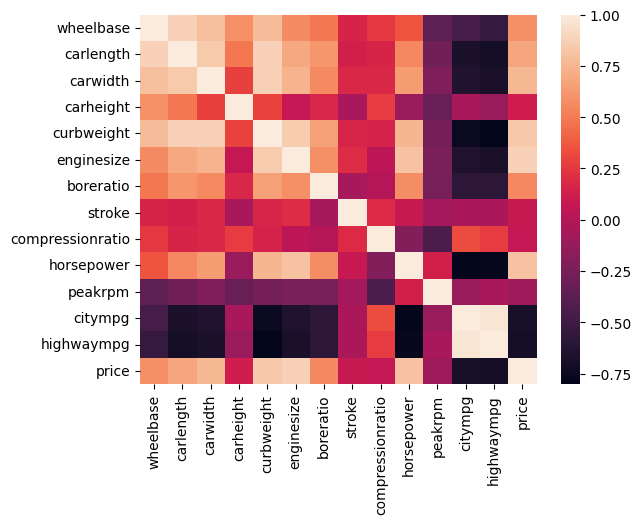

In [43]:
sbn.heatmap(num_data.corr())

In [44]:
num_data["M3 size"]=num_data['carlength']*num_data['carwidth']*num_data['carheight']
num_data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,M3 size
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,528019.904
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,528019.904
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,587592.640
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,634816.956
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,636734.832


In [45]:
num_data["powerweightratio"]=num_data["horsepower"]/num_data["curbweight"]

In [46]:
num_data.drop(['stroke','compressionratio','peakrpm','carheight','carlength','carwidth','horsepower','curbweight'],axis=1,inplace=True)

In [47]:
num_data.head()

,wheelbase,enginesize,boreratio,citympg,highwaympg,price,M3 size,powerweightratio
0,88.6,130,3.47,21,27,13495.0,528019.904,0.043564
1,88.6,130,3.47,21,27,16500.0,528019.904,0.043564
2,94.5,152,2.68,19,26,16500.0,587592.640,0.054552
3,99.8,109,3.19,24,30,13950.0,634816.956,0.043646
4,99.4,136,3.19,18,22,17450.0,636734.832,0.040722


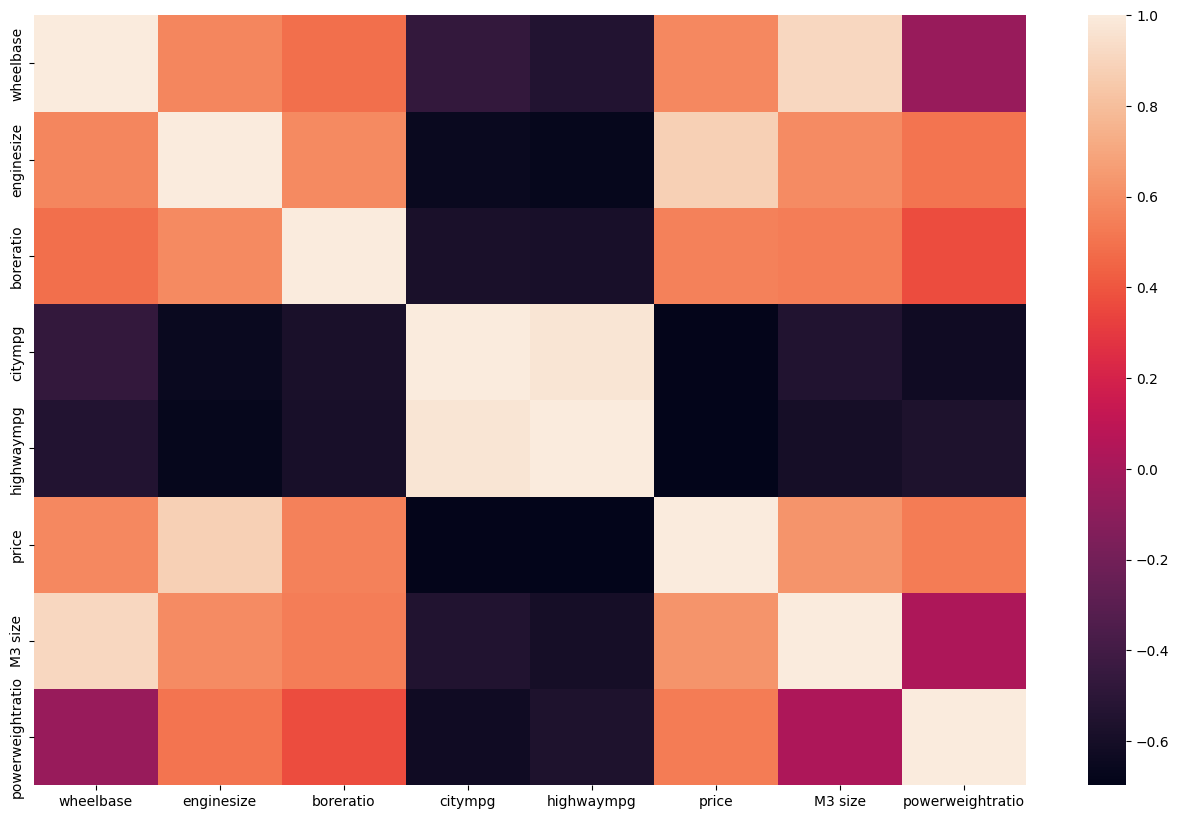

In [48]:
plt.figure(figsize=(16,10))
sbn.heatmap(num_data.corr())
plt.show()

finalizing our dataset

In [49]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()

In [50]:
scaled = scaled.fit_transform(num_data)
print(scaled)

[[-1.6907718   0.07444893  0.51907138 ...  0.02739114 -1.14419531
   0.36668374]
 [-1.6907718   0.07444893  0.51907138 ...  0.4044611  -1.14419531
   0.36668374]
 [-0.70859588  0.60404617 -2.40488029 ...  0.4044611  -0.39267042
   1.51767836]
 ...
 [ 1.72187336  1.10957081  0.9262039  ...  1.02998314  1.30242947
   0.46358873]
 [ 1.72187336  0.43553795 -1.18348276 ...  1.15358178  1.30242947
  -0.74506318]
 [ 1.72187336  0.33924755  1.66644483 ...  1.17303131  1.30242947
  -0.29668102]]


In [52]:
data=pd.concat([num_data,cat_data],axis=1)
data.head()

,wheelbase,enginesize,boreratio,citympg,highwaympg,price,M3 size,powerweightratio,carbody,enginelocation,enginetype,Model
0,88.6,130,3.47,21,27,13495.0,528019.904,0.043564,convertible,front,others,alfa-romero
1,88.6,130,3.47,21,27,16500.0,528019.904,0.043564,convertible,front,others,alfa-romero
2,94.5,152,2.68,19,26,16500.0,587592.640,0.054552,hatchback,front,others,alfa-romero
3,99.8,109,3.19,24,30,13950.0,634816.956,0.043646,sedan,front,ohc,audi
4,99.4,136,3.19,18,22,17450.0,636734.832,0.040722,sedan,front,ohc,audi


In [53]:
data.shape

(205, 12)

In [54]:
data.columns

Index(['wheelbase', 'enginesize', 'boreratio', 'citympg', 'highwaympg',
       'price', 'M3 size', 'powerweightratio', 'carbody', 'enginelocation',
       'enginetype', 'Model'],
      dtype='object')

# SPLITING DATA

In [55]:
x=data.drop('price',axis=1)
y=data.price

In [56]:
from sklearn.model_selection import train_test_split



X_train,X_test,Y_train,Y_test = train_test_split(x,y, train_size = 0.7, random_state = 100)



In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [58]:
ohe=OneHotEncoder()
ohe.fit(x[['carbody', 'enginelocation','enginetype', 'Model']])

OneHotEncoder()

In [59]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),cat),remainder='passthrough')

#    PREPARING OUR MODEL

## MODEL 1: LINEAR REGRESSION MODEL

In [60]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
pipe=make_pipeline(column_trans,model1)
pipe.fit(X_train,Y_train)
print(model1.coef_)
print(model1.intercept_)

[ 1.65896217e+03  1.20701428e+03  1.02512116e+02 -1.08695105e+03
 -1.88153752e+03 -1.79073714e+03  1.79073714e+03 -4.00685520e+02
  4.00685520e+02  5.22525601e+02  9.56542014e+02  4.80420893e+03
  3.23847183e+03  1.47992676e+03 -1.49898147e+02 -4.88149158e+02
  4.63149851e+02 -8.44733720e+02  1.44897848e+03  0.00000000e+00
 -3.17054223e+03 -3.08446982e+03 -1.74838336e+03 -2.26106805e+02
  3.55843843e+03 -1.52261896e+03  3.07551514e+02 -1.79262148e+03
 -3.68789646e+03 -6.52474984e+02  5.88101701e+02  1.28146209e+02
  1.09282196e+02  6.58345943e+01 -1.16550858e+02  8.03696764e-01
  1.38169891e-02  1.08323207e+02]
-15689.68586807475


In [61]:
print(X_train)

     wheelbase  enginesize  boreratio  citympg  highwaympg     M3 size  \
122       93.7          98       2.97       31          38  542225.992   
125       94.5         151       3.94       19          27  579100.674   
166       94.5          98       3.24       26          29  567911.680   
1         88.6         130       3.47       21          27  528019.904   
199      104.3         130       3.62       17          22  729523.200   
..         ...         ...        ...      ...         ...         ...   
87        96.3         110       3.17       23          30  581787.936   
103      100.4         181       3.43       19          25  676402.090   
67       110.0         183       3.58       22          25  758245.255   
24        93.7          90       2.97       31          38  507808.444   
8        105.8         131       3.13       17          20  769115.802   

     powerweightratio      carbody enginelocation enginetype        Model  
122          0.031036        sedan 

In [62]:
r_squared = pipe.score(X_train,Y_train)
print(r_squared)

0.8906673217247316


In [63]:
from sklearn.metrics import mean_absolute_error
ypred=pipe.predict(X_train)
mean_absolute_error(Y_train,ypred)

2064.0376623266666

In [64]:
print(pipe.score(X_train,Y_train))
print(pipe.score(X_test,Y_test))

0.8906673217247316
0.8939956608128969


## MODEL2 :RANDOMFOREST REGRESSOR

In [65]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor(random_state=0,max_depth=75,n_estimators=100)
pipe2=make_pipeline(column_trans,model2)

pipe2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
      dtype=object),
                                                                            array(['front', 'rear'], dtype=object),
                                                                            array(['ohc', 'others'], dtype=object),
                                                                            array(['alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)]),
                                                  ['carbody', 'enginelocation',
                                                   'enginetype', 'Model'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=75, random_state=0))])

In [66]:
pipe2.fit(X_train,Y_train)
print(pipe2.score(X_train,Y_train))
print(pipe2.score(X_test,Y_test))
ypred=pipe2.predict(X_train)
print(mean_absolute_error(Y_train,ypred))

0.9881469554363775
0.901397316372252
591.3367349617051


In [67]:
import pickle

In [68]:
pickle.dump(pipe2,open('RandomForestModel.pkl','wb'))

In [69]:
data.to_csv('finaldata.csv',index=False)

# Conclusion

Model 2 peforms better than model1 so we save our model2 .